<a href="https://colab.research.google.com/github/prat-man/CSE-575-Statistical-Machine-Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

In [2]:
import httpimport

with httpimport.remote_repo('https://raw.githubusercontent.com/prat-man/CSE-575-Statistical-Machine-Learning/main'):
    from data import get_data

In [3]:
seed = 0

In [4]:
X_train, X_val, X_test, y_train, y_val, y_test, labels = get_data('ANN')

In [5]:
model_layers = [
    Input(X_train.shape[1]),

    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),

    Dense(10, activation='softmax')
]

model = Sequential(model_layers)

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3712      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 12,682
Trainable params: 12,682
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64)

Epoch 1/50
10/10 [==============================] - 4s 113ms/step - loss: 2.2834 - accuracy: 0.1600 - val_loss: 2.0637 - val_accuracy: 0.2900
Epoch 2/50
10/10 [==============================] - 0s 15ms/step - loss: 2.0129 - accuracy: 0.3500 - val_loss: 1.8965 - val_accuracy: 0.3450
Epoch 3/50
10/10 [==============================] - 0s 45ms/step - loss: 1.8259 - accuracy: 0.4183 - val_loss: 1.7257 - val_accuracy: 0.4200
Epoch 4/50
10/10 [==============================] - 0s 12ms/step - loss: 1.6377 - accuracy: 0.4700 - val_loss: 1.5573 - val_accuracy: 0.4600
Epoch 5/50
10/10 [==============================] - 0s 21ms/step - loss: 1.4684 - accuracy: 0.5267 - val_loss: 1.4078 - val_accuracy: 0.5300
Epoch 6/50
10/10 [==============================] - 0s 21ms/step - loss: 1.3067 - accuracy: 0.5667 - val_loss: 1.3050 - val_accuracy: 0.5700
Epoch 7/50
10/10 [==============================] - 0s 17ms/step - loss: 1.1717 - accuracy: 0.6200 - val_loss: 1.1999 - val_accuracy: 0.6200
Epoch 8/50
1

In [9]:
_, accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {accuracy}')

19/19 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 1.0000
Training Accuracy: 1.0


In [10]:
y_pred = model.predict(X_test)

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

7/7 [==============================] - 0s 3ms/step


In [11]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        20
           1       1.00      0.85      0.92        20
           2       0.75      0.75      0.75        20
           3       0.59      0.65      0.62        20
           4       0.68      0.75      0.71        20
           5       0.82      0.90      0.86        20
           6       0.90      0.90      0.90        20
           7       0.94      0.80      0.86        20
           8       0.67      0.50      0.57        20
           9       0.44      0.60      0.51        20

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.73       200
weighted avg       0.75      0.73      0.73       200



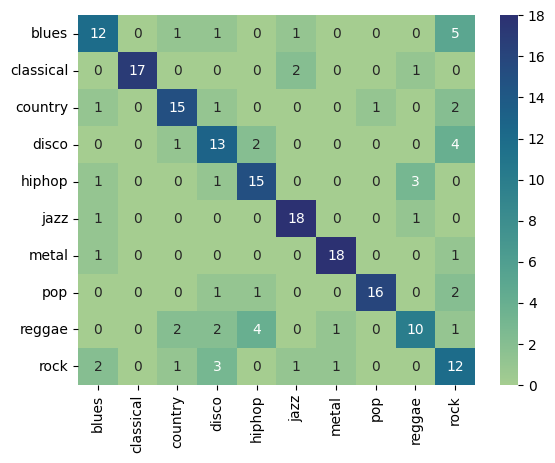

In [12]:
conf_m = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_m, cmap='crest', annot=True)

plt.xticks(ticks = np.arange(0.5, 10, 1), labels=labels, rotation=90)
plt.yticks(ticks = np.arange(0.5, 10, 1), labels=labels,rotation=0)

plt.savefig('ANN_Confusion_Matrix.png', dpi=300)

In [13]:
accuracy = np.trace(conf_m) / np.sum(conf_m)
print(f'Overall test accuracy = {accuracy}')

Overall test accuracy = 0.73


In [14]:
accuracy_df = pd.DataFrame(columns=['accuracy'])

class_acc = conf_m.diagonal() / conf_m.sum(axis=1)
for i in range(len(labels)):
    accuracy_df.loc[labels[i]] = [round(class_acc[i], 2)]

accuracy_df

,accuracy
blues,0.60
classical,0.85
country,0.75
disco,0.65
hiphop,0.75
jazz,0.90
metal,0.90
pop,0.80
reggae,0.50
rock,0.60


In [15]:
model.save('ANN.h5')